In [2]:
import pandas as pd
import numpy as np

In [2]:
math = pd.read_csv("math_zero_shot_CoT.csv")

In [313]:
i = 299
print(math["solution"][i])
print("")
print(math["zero-shot CoT reasoning answer"][i])

The line containing $\mathbf{a}$ and $\mathbf{b}$ can be parameterized by
\[\mathbf{c} = \mathbf{a} + t (\mathbf{b} - \mathbf{a}) = \begin{pmatrix} -2 + 3t \\ 5 - 2t \end{pmatrix}.\]Since $\mathbf{b}$ bisects the angle between $\mathbf{a}$ and $\mathbf{c},$ the angle between $\mathbf{a}$ and $\mathbf{b}$ must be equal to the angle between $\mathbf{b}$ and $\mathbf{c}.$  Thus,
\[\frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{a}\| \|\mathbf{b}\|} = \frac{\mathbf{b} \cdot \mathbf{c}}{\|\mathbf{b}\| \|\mathbf{c}\|}.\]Then $\frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{a}\|} = \frac{\mathbf{b} \cdot \mathbf{c}}{\|\mathbf{c}\|},$ so
\[\frac{\begin{pmatrix} -2 \\ 5 \end{pmatrix} \cdot \begin{pmatrix} 1 \\ 3 \end{pmatrix}}{\left\| \begin{pmatrix} -2 \\ 5 \end{pmatrix} \right\|} = \frac{\begin{pmatrix} 1 \\ 3 \end{pmatrix} \cdot \begin{pmatrix} -2 + 3t \\ 5 - 2t \end{pmatrix}}{\left\| \begin{pmatrix} -2 + 3t \\ 5 - 2t \end{pmatrix} \right\|}.\]Hence,
\[\frac{13}{\sqrt{29}} = \frac{13 - 3t}{\sqrt{(

In [316]:
correct = [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [317]:
len(correct)

300

In [320]:
np.mean(correct)

0.2

In [321]:
np.mean(correct[:60])

0.4166666666666667

In [322]:
np.mean(correct[61:120])

0.2711864406779661

In [323]:
np.mean(correct[121:180])

0.1864406779661017

In [325]:
np.mean(correct[181:240])

0.05084745762711865

In [326]:
np.mean(correct[241:])

0.05084745762711865

In [3]:
math = pd.read_csv("math_zero_shot_CoT2.csv")

In [5]:
problems = math["problem"]

In [7]:
gpt_answers = []

In [11]:
from tqdm import tqdm
import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")

for i in tqdm(range(223, len(problems))):
    try:
        responses = openai.ChatCompletion.create(
          model="gpt-3.5-turbo",
          messages = [{"role": "user", "content": problems[i] + " Output the answer directly. Do not contain any words other than the answer."}],
          temperature=0,
          max_tokens=256,
        )
        resp = responses.choices[0].message.content
        gpt_answers.append((i, resp))
    except KeyboardInterrupt:
        raise KeyboardInterrupt
    except Exception as e:
        print(e)
        time.sleep(10)
        responses = openai.ChatCompletion.create(
          model="gpt-3.5-turbo",
          messages = [{"role": "user", "content": problems[i]} + " Output the answer directly. Do not contain any words other than the answer."],
          temperature=0,
          max_tokens=256,
        )
        resp = responses.choices[0].message.content
        gpt_answers.append((i, resp))

100%|██████████████████████████████████████████████████████████████████████████████████| 77/77 [05:13<00:00,  4.07s/it]


In [10]:
len(gpt_answers)

223

In [17]:
math["GPT"] = [e[1] for e in gpt_answers]
math

,Unnamed: 0,Unnamed: 0.1,problem,level,type,solution,zero-shot CoT reasoning chain,zero-shot CoT reasoning answer,GPT
0,0,1697,"If $\frac 25 = \frac A{60} = \frac {60}B$, wha...",Level 1,Algebra,The equations allow us to solve for both $A$ a...,\n$\frac 25 = \frac A{60} = \frac {60}B$\n$\fr...,$\frac {60}{B} + B$,$\boxed{150}$
1,1,3702,Compute $\dbinom{5}{3}$.,Level 1,Counting & Probability,$$\dbinom{5}{3} = \dfrac{5!}{3!2!}=\dfrac{(5\t...,\n\nWe want to choose three objects from a set...,$\dbinom{5}{3} = 60$.,10
2,2,11170,Simplify the fraction $\frac{27}{30}$.,Level 1,Prealgebra,"Since 27 and 30 have a common factor of 3, we ...",\n\nThe first step is to find the greatest com...,$\frac{9}{10}$.,$\frac{9}{10}$
3,3,10808,Compute $\left(\sqrt{97969}\right)^2$.,Level 1,Prealgebra,"For any nonnegative number $n$, the value of $...",\n\n$\sqrt{97969} = \sqrt{97969} \cdot \sqrt{9...,$\sqrt{97969} \cdot \sqrt{97969} = 97969$.,9597921761
4,4,6597,Find all the integer roots of\n\[x^4 + 5x^3 + ...,Level 1,Intermediate Algebra,"By the Integer Root Theorem, the possible inte...","\n\nFirst, we can factor out an $x$:\n\[x(x^3 ...","-1,-2,-7.","By the Integer Root Theorem, any integer root ..."
...,...,...,...,...,...,...,...,...,...
295,295,8795,If $\frac{a}{b}$ is the probability that the r...,Level 5,Number Theory,There are 2009 positive integers less than 201...,"\nFirst, we need to find the probability that ...",4.,The only way for the reciprocal of an odd inte...
296,296,7842,"Given that $13^{-1} \equiv 29 \pmod{47}$, find...",Level 5,Number Theory,"Note that $34 \equiv -13 \pmod{47}$. Hence, \...",\n$13^{-1} \equiv 29 \pmod{47}$ means that $13...,29.,$34^{-1} \equiv (2\cdot 17)^{-1} \equiv 17^{-1...
297,297,7100,"Let\n\[x^8 + 98x^4 + 1 = p(x) q(x),\]where $p(...",Level 5,Intermediate Algebra,"In order to factor the polynomial, we will try...",\n$x^8 + 98x^4 + 1 = p(x) q(x)$\n$x^8 + 98x^4 ...,$a + e + b + f + ae + c + g + af + be + d + h...,We have that\n\[x^8 + 98x^4 + 1 = (x^4 + ax^3 ...
298,298,9235,A number is called a visible factor number if ...,Level 5,Prealgebra,"To begin with, note that all the numbers in qu...","\nThe number must be divisible by 1 and 2, so ...",0.,6


In [57]:
i = 29
for i in range(i * 10, i * 10 + 10):
    print(math["GPT"].iloc[i])
    print("---------------")
    print(math["solution"].iloc[i])
    print("##############")

Let $O$ be the point $(0,0)$, let $A$ be the point $(a,0)$, and let $B$ be the point $(0,b)$. Then the given system of equations implies that $OA=OB=AB$, so $OAB$ is an equilateral triangle. Let $P$ be the point $(x,y)$, and let $Q$ be the point $(a-x,b-y)$. Then $PQ=AB$, so $PQ=OA+OB=2a$. By the triangle inequality, $OP+PQ+OQ\ge 2OA+2OB=2AB$, so $OP+OQ\ge 2a-PQ=2a-2a=0$. Thus, $P$ and $Q$ lie on opposite sides of the line $y=-x$. Since $P$ and $Q$ also lie in the rectangle $0\le x<a$, $0\le y<b$, it follows that $P$ and $Q$ must lie in the shaded region below:

[asy]
size(5cm);
draw((0,0)--(4,0)--(4,3)--(0,3)--cycle);
draw
---------------
Expanding, we get
\[b^2 + x^2 = a^2 - 2ax + x^2 + b^2 - 2by + y^2.\]Hence,
\[a^2 + y^2 = 2ax + 2by.\]Note that
\[2by > 2y^2 \ge y^2,\]so $2by - y^2 \ge 0.$  Since $2by - y^2 = a^2 - 2ax,$ $a^2 - 2ax \ge 0,$ or
\[a^2 \ge 2ax.\]Since $a > 0,$ $a \ge 2x,$ so
\[x \le \frac{a}{2}.\]Now,
\[a^2 \le a^2 + y^2 = b^2 + x^2 \le b^2 + \frac{a^2}{4},\]so
\[\frac{

In [63]:
correct = [0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]

In [81]:
math["correct"] = correct
math[math["correct"] == 1].groupby("type").count()["correct"] / math.groupby("type").count()["correct"]

type
Algebra                   0.314286
Counting & Probability    0.370370
Geometry                  0.250000
Intermediate Algebra      0.173913
Number Theory             0.210526
Prealgebra                0.442623
Precalculus               0.263158
Name: correct, dtype: float64

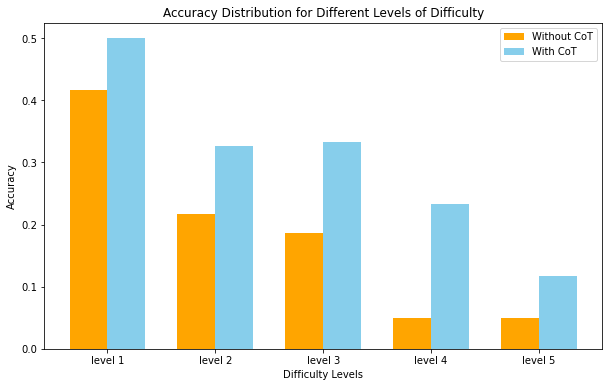

In [84]:
type_arr = ["level 1", "level 2", "level 3", "level 4", "level 5"]
acc = [41.70, 21.70, 18.60, 5, 5]
acc2 = [50, 32.67, 33.33, 23.33, 11.67]

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,6))
x = np.arange(len(type_arr))
bar_width = 0.35
plt.bar(x, np.array(acc) / 100, width=bar_width, color = "orange", label='Without CoT')
plt.bar(x + bar_width, np.array(acc2) / 100, width=bar_width, color = "skyblue", label='With CoT')
plt.xticks(x + bar_width/2, type_arr)
plt.xlabel("Difficulty Levels")
plt.legend()
plt.ylabel("Accuracy")
plt.title("Accuracy Distribution for Different Levels of Difficulty")
plt.show()

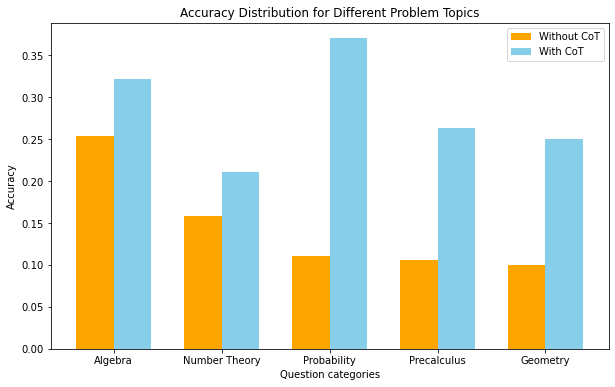

In [88]:
acc2 = [32.2, 21.05, 37.03, 26.31, 25]
type_arr = ["Algebra", "Number Theory", "Probability", "Precalculus", "Geometry"]
acc = [25.42, 15.79, 11.11, 10.53, 10]
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,6))
x = np.arange(len(type_arr))
bar_width = 0.35
plt.bar(x, np.array(acc) / 100, width=bar_width, color = "orange", label='Without CoT')
plt.bar(x + bar_width, np.array(acc2) / 100, width=bar_width, color = "skyblue", label='With CoT')
plt.xticks(x + bar_width/2, type_arr)
plt.xlabel("Question categories")
plt.legend()
plt.ylabel("Accuracy")
plt.title("Accuracy Distribution for Different Problem Topics")
plt.show()

In [93]:
math[math["correct"] == 0].groupby("type").count()

,Unnamed: 0,Unnamed: 0.1,problem,level,solution,zero-shot CoT reasoning chain,zero-shot CoT reasoning answer,GPT,correct
type,,,,,,,,,
Algebra,48,48,48,48,48,48,48,48,48
Counting & Probability,17,17,17,17,17,17,17,17,17
Geometry,15,15,15,15,15,15,15,15,15
Intermediate Algebra,38,38,38,38,38,38,38,38,38
Number Theory,30,30,30,30,30,30,30,30,30
Prealgebra,34,34,34,34,34,34,34,34,34
Precalculus,28,28,28,28,28,28,28,28,28


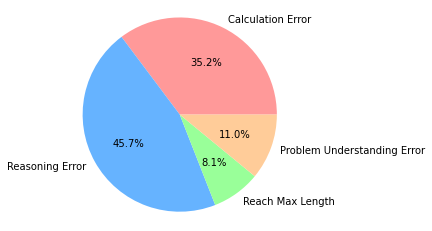

In [96]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Calculation Error', 'Reasoning Error', 'Reach Max Length', 'Problem Understanding Error']
sizes = [74, 96, 17, 23]  # The values or sizes of each section

# Create the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors)

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')


# Display the plot
plt.show()